In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [10]:
df['Rings']=df['Rings'].astype(float)

In [11]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings             float64
dtype: object

In [23]:
df_visualization_nominal=df[['Sex']].copy()

In [24]:
df_visualization_nominal.columns

Index(['Sex'], dtype='object')

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


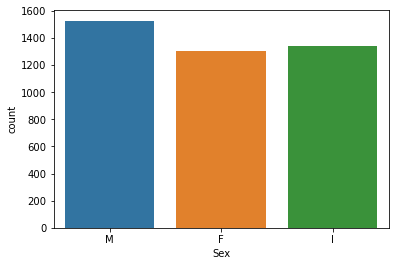

In [25]:
ax=sns.countplot(x="Sex",data=df_visualization_nominal)
print(df_visualization_nominal["Sex"].value_counts())
df

In [29]:
df_visualization_continuous=df[["Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight"]].copy()

<AxesSubplot:xlabel='Length', ylabel='Density'>

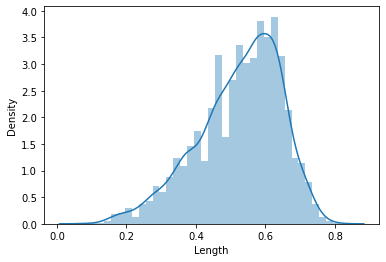

In [30]:
sns.distplot(df_visualization_continuous['Length'],kde=True)

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

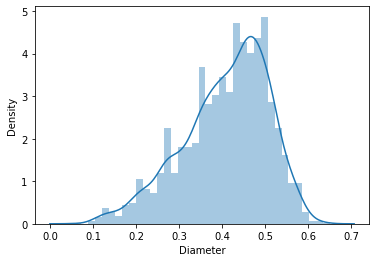

In [31]:
sns.distplot(df_visualization_continuous['Diameter'],kde=True)

<AxesSubplot:xlabel='Height', ylabel='Density'>

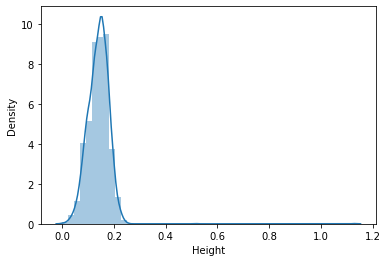

In [33]:
sns.distplot(df_visualization_continuous['Height'],kde=True)

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

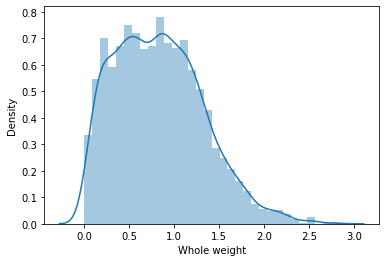

In [34]:
sns.distplot(df_visualization_continuous['Whole weight'],kde=True)

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

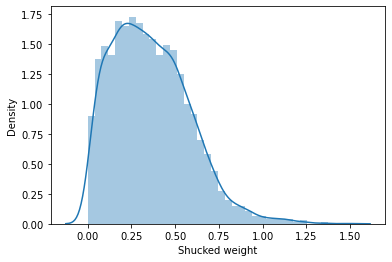

In [35]:
sns.distplot(df_visualization_continuous['Shucked weight'],kde=True)

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

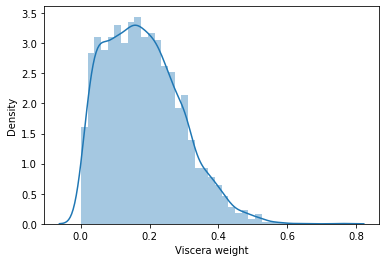

In [38]:
sns.distplot(df_visualization_continuous['Viscera weight'],kde=True)

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

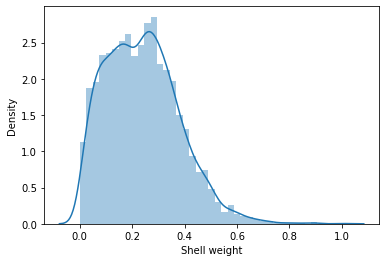

In [39]:
sns.distplot(df_visualization_continuous['Shell weight'],kde=True)

In [40]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [49]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [50]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


In [52]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:>

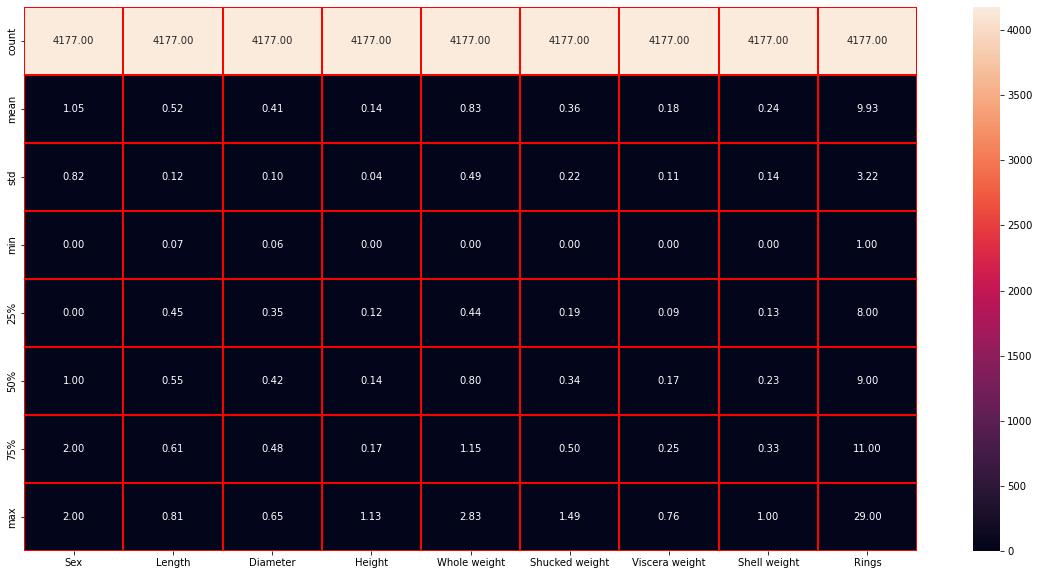

In [55]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f")

In [56]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

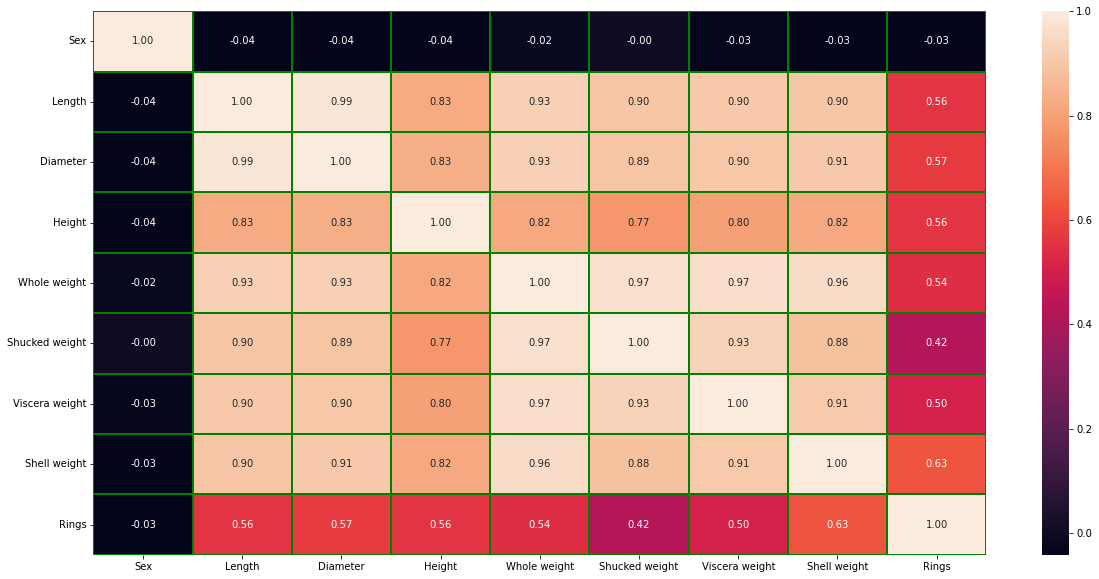

In [57]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="Green",fmt="0.2f")

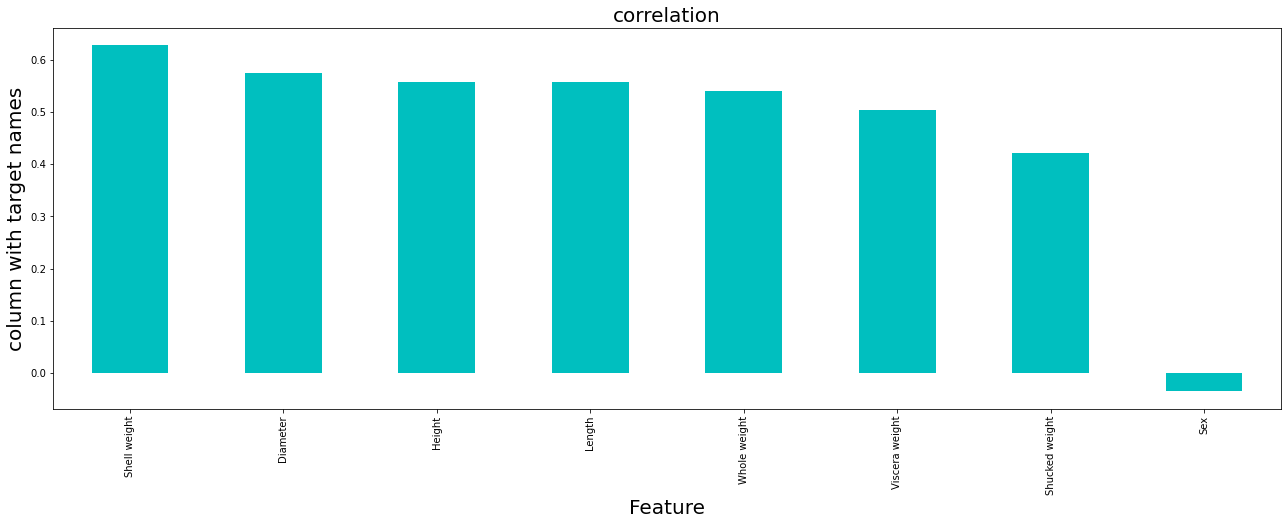

In [58]:
plt.figure(figsize=(22,7))
df.corr()['Rings'].sort_values(ascending = False).drop(['Rings']).plot(kind='bar',color = 'c')
plt.xlabel('Feature', fontsize = 20)
plt.ylabel('column with target names', fontsize = 20)
plt.title('correlation', fontsize = 20)
plt.show()

In [59]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

<AxesSubplot:>

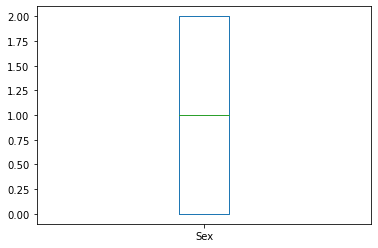

In [60]:
df['Sex'].plot.box()

<AxesSubplot:>

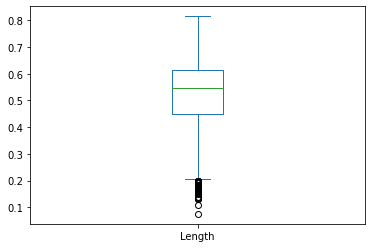

In [61]:
df['Length'].plot.box()

<AxesSubplot:>

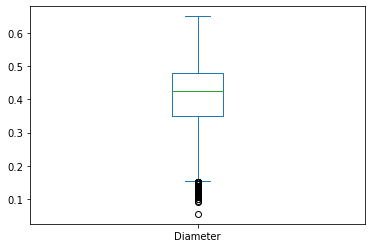

In [62]:
df['Diameter'].plot.box()

<AxesSubplot:>

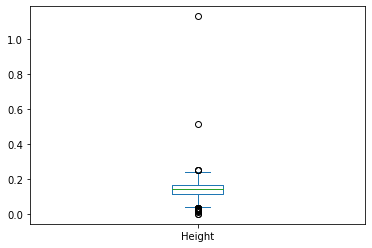

In [63]:
df['Height'].plot.box()

<AxesSubplot:>

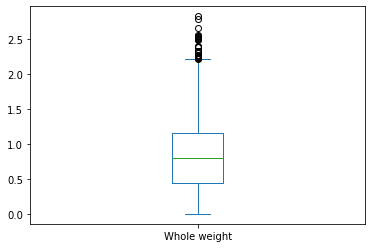

In [64]:
df['Whole weight'].plot.box()

<AxesSubplot:>

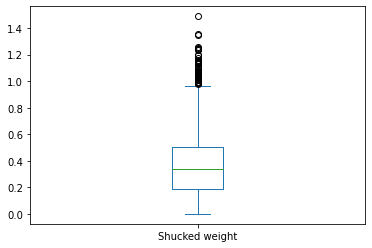

In [65]:
df['Shucked weight'].plot.box()

<AxesSubplot:>

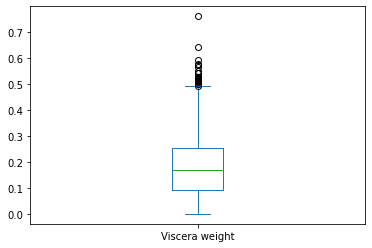

In [66]:
df['Viscera weight'].plot.box()

<AxesSubplot:>

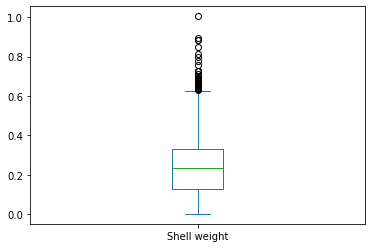

In [67]:
df['Shell weight'].plot.box()

<AxesSubplot:>

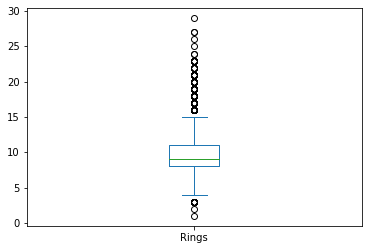

In [68]:
df['Rings'].plot.box()

In [69]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [70]:
x = df.drop("Rings",axis=1)
y = df["Rings"]

In [71]:
for i in range(0,80):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the training accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.5266943382158247
At random state 0, the training accuracy is:- 0.5300147524184924


At random state 1, the training accuracy is:- 0.53428007569936
At random state 1, the training accuracy is:- 0.4992317277874875


At random state 2, the training accuracy is:- 0.526253053600996
At random state 2, the training accuracy is:- 0.5151729794207711


At random state 3, the training accuracy is:- 0.5331198013832301
At random state 3, the training accuracy is:- 0.5015582743334919


At random state 4, the training accuracy is:- 0.5382795526015923
At random state 4, the training accuracy is:- 0.47330646590738945


At random state 5, the training accuracy is:- 0.5388633829890346
At random state 5, the training accuracy is:- 0.48137865136508573


At random state 6, the training accuracy is:- 0.5179147252140498
At random state 6, the training accuracy is:- 0.5660674008870981


At random state 7, the training accuracy is:- 0.5245384466523474
At random st

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [73]:
lr.fit(x_train,y_train)

LinearRegression()

In [74]:
pred_test=lr.predict(x_test)

In [75]:
print(r2_score(y_test,pred_test))

0.49430495824531184


In [76]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

In [77]:
for j in range(2,15):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.5045305294380884 and accuracy score for training is -0.5411903403074869 and accuracy for the testing is 0.49430495824531184


At cross fold 3 the cv score is 0.4862195244230116 and accuracy score for training is -0.5411903403074869 and accuracy for the testing is 0.49430495824531184


At cross fold 4 the cv score is 0.36963955335620435 and accuracy score for training is -0.5411903403074869 and accuracy for the testing is 0.49430495824531184


At cross fold 5 the cv score is 0.3980361557787401 and accuracy score for training is -0.5411903403074869 and accuracy for the testing is 0.49430495824531184


At cross fold 6 the cv score is 0.374316598902438 and accuracy score for training is -0.5411903403074869 and accuracy for the testing is 0.49430495824531184


At cross fold 7 the cv score is 0.42794108868716346 and accuracy score for training is -0.5411903403074869 and accuracy for the testing is 0.49430495824531184


At cross fold 8 the cv score is 0.33603

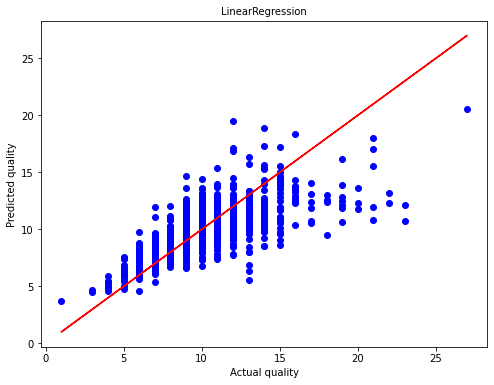

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual quality',fontsize=10)
plt.ylabel('Predicted quality',fontsize=10)
plt.title('LinearRegression',fontsize=10)
plt.show()

In [79]:
parameters = {'alpha':[.0001, .001, .01, 1,10],'random_state':list(range(0,10))}
ls = Lasso() 
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [80]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

-0.0015294396859673043

In [81]:
rf = RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test, pred_decision)
print('R2 score:', rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross val Score:', rfc*100)

R2 score: 52.865332137404074
Cross val Score: 46.14428697175342


In [84]:
x = df.drop("Rings",axis=1)
y = df["Rings"]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [85]:
y

0       15.0
1        7.0
2        9.0
3       10.0
4        7.0
        ... 
4172    11.0
4173    10.0
4174     9.0
4175    10.0
4176    12.0
Name: Rings, Length: 4177, dtype: float64

In [86]:
scaler= StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.15198011, -0.57455813, -0.43214879, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [ 1.15198011, -1.44898585, -1.439929  , ..., -1.17090984,
        -1.20522124, -1.21298732],
       [-1.28068972,  0.05003309,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.49695471],
       [-1.28068972,  0.84118198,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.15198011,  1.54905203,  1.48263359, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = 49)
y_train.head()

1650    11.0
2105    10.0
3140    20.0
3711    11.0
2392    10.0
Name: Rings, dtype: float64

In [88]:
df.tail(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10.0
4176,2.0,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12.0


In [89]:
print('Rings :', ls.predict(scaler.transform([[0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10.0]])))

Rings : [9.90870997]


In [90]:
filename = "redwine.pkl"
pickle.dump(rf,open(filename, 'wb'))